In [1]:
%matplotlib inline

In [2]:
import bloom_filter

In [3]:
import pickle
import matplotlib.pyplot as plt
from numpy import log2

def graph_results(results):
    """
    Graphs consecutive drops of pi as generated by the function
    consecutive_buffons_needle_pi_approximation
    for the given values of n, repeated number_of_simulations times
    """
    plt.figure(figsize=(12, 8), dpi=400)
    
    for theoretical_p in results:
        p_results = results[theoretical_p]
        x = p_results.keys()
        y = [p_results[key] for key in x]
        power = int(log2(theoretical_p))
        line = plt.loglog(x, len(x) * [theoretical_p], 
                          label='Theoretical p=2^{exp}'.format(exp=power), 
                          basex=2, basey=2)[0]
        plt.scatter(x, y, color=line._color, 
                    label='Empirical false-positive rates for p=2^{exp}'.format(exp=power))
        
    
    plt.grid(True)
    plt.title("Theoretical and Empirically Observed False Positive Rates")
    plt.xlabel("Bloom filter set size (n)")
    plt.ylabel("False-positive rate")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.show()
    


/Users/guydavidson/Virtualenvs/dev/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


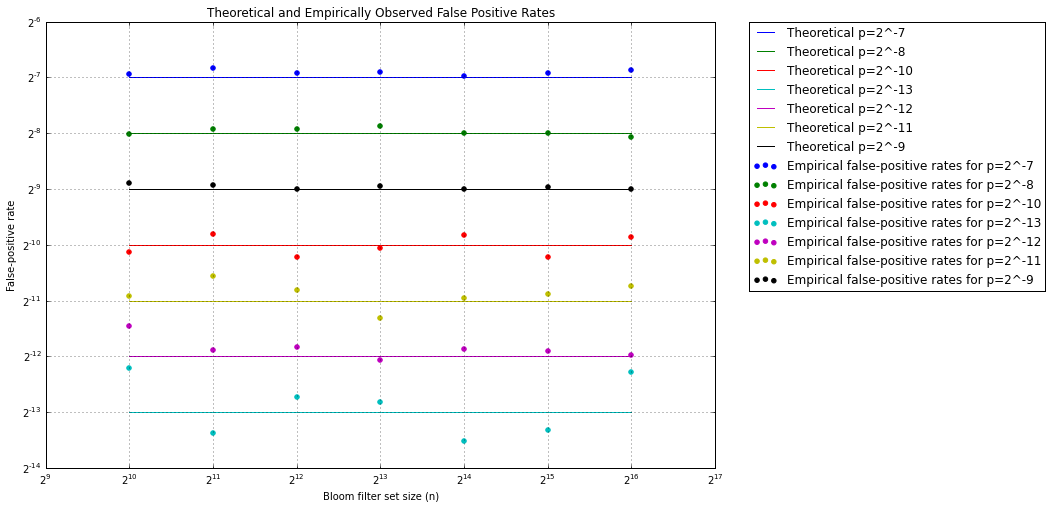

In [4]:
results_dict = pickle.load(open(bloom_filter.FP_RATES_OUTPUT_FILE))
graph_results(results_dict)

In [5]:
def graph_cbf_results(results):
    x_values = sorted(results.keys())
    # Graph theoretical and empirical false positive rates
    plt.figure(figsize=(12, 8), dpi=400)
    plt.semilogy(x_values, [results[x]['theoretical'] for x in x_values],
            marker='o', label='Theoretical false positive rate')
    plt.semilogy(x_values, [results[x]['empirical'] for x in x_values],
            marker='o', label='Empirical false positive rate')
    
    plt.grid(True)
    plt.title("Theoretical and Empirically Observed False Positive Rates For Different Size Multipliers")
    plt.xlabel("Uncompressed size multiplier\nHigher means more memory used")
    plt.ylabel("False-positive rate")
    plt.legend()
    plt.show()
    
    # Graph insert times
    fig, ax1 = plt.subplots()
    fig.dpi = 400
    fig.set_size_inches(12, 8)

    ax1.plot(x_values, [results[x]['insert time'] for x in x_values],
            marker='o', label='Insert time')
    ax1.grid(True)
    ax1.set_title("Total Insert Times For Different Size Multipliers (Inserting 10 ** 6 items)")
    ax1.set_xlabel("Uncompressed size multiplier\nHigher means more memory used")
    ax1.set_ylabel("Total insert time (seconds)")
    ax1.legend()
    
    sample_size = results[1]['insert size']
    ax2 = ax1.twinx()
    ax2.set_ylabel('k (number of hash functions used)')
    ax2.plot(x_values, [results[x]['k'] for x in x_values],
            marker='o', color='green', label='k values')
    ax2.legend(bbox_to_anchor=(0.97, 0.93), loc=1, borderaxespad=0.)
    plt.show()
    
    # Graph pre and post-compression file sizes
    plt.figure(figsize=(12, 8), dpi=400)
    plt.plot(x_values, [results[x]['file size pre']/1024.0 for x in x_values],
            marker='o', label='File size before compression')
    plt.plot(x_values, [results[x]['file size post']/1024.0 for x in x_values],
            marker='o', label='File sized compressed using arithmetic coding')
    
    plt.grid(True)
    plt.title("Pre- and Post-Compression File Sizes For Different Size Multipliers")
    plt.xlabel("Uncompressed size multiplier\nHigher means more memory used")
    plt.ylabel("File size (kilobytes)")
    plt.legend()
    plt.show()        


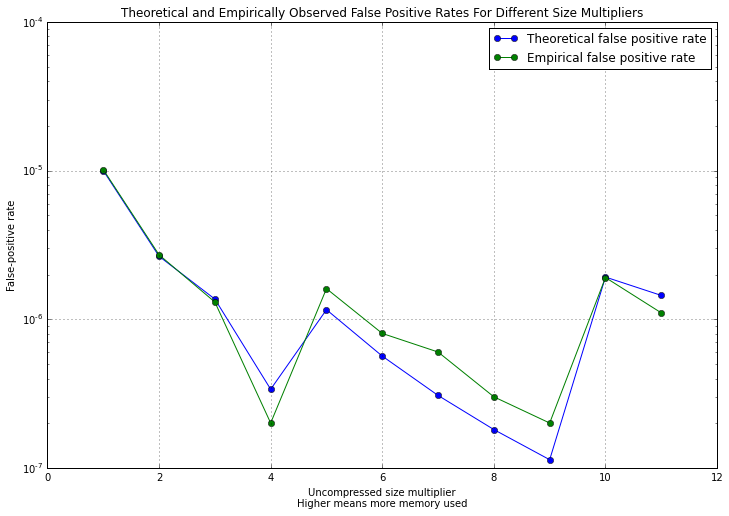

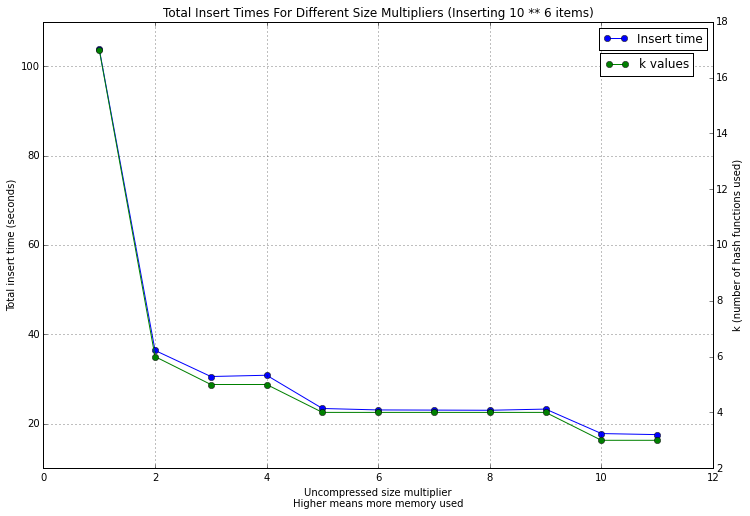

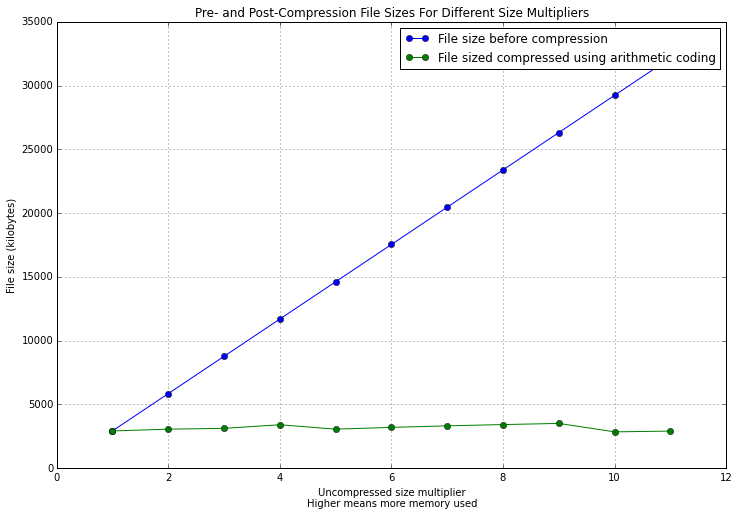

In [6]:
compressed_results_dict = pickle.load(open(bloom_filter.COMPRESSED_RESULTS_FILE))
graph_cbf_results(compressed_results_dict)

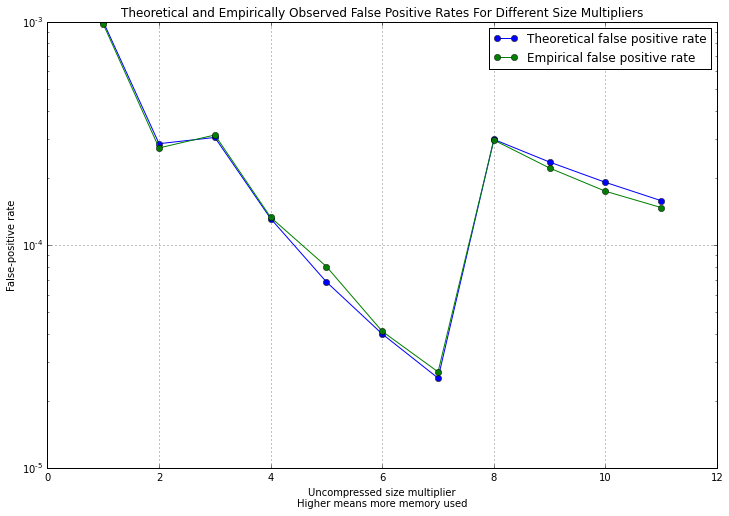

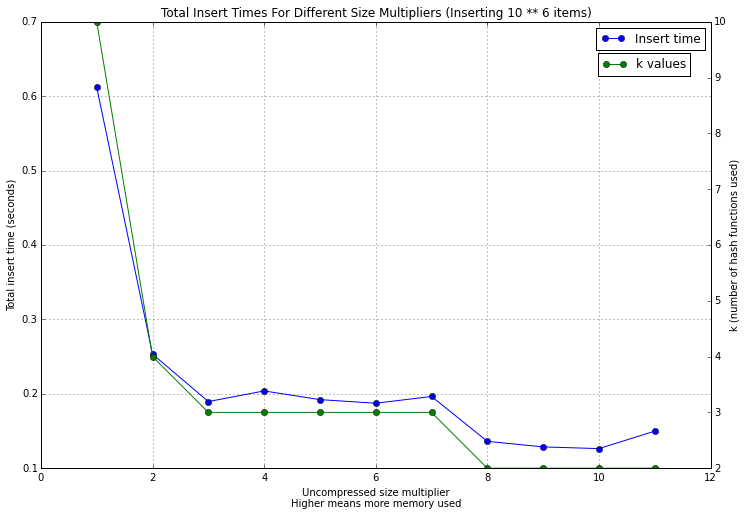

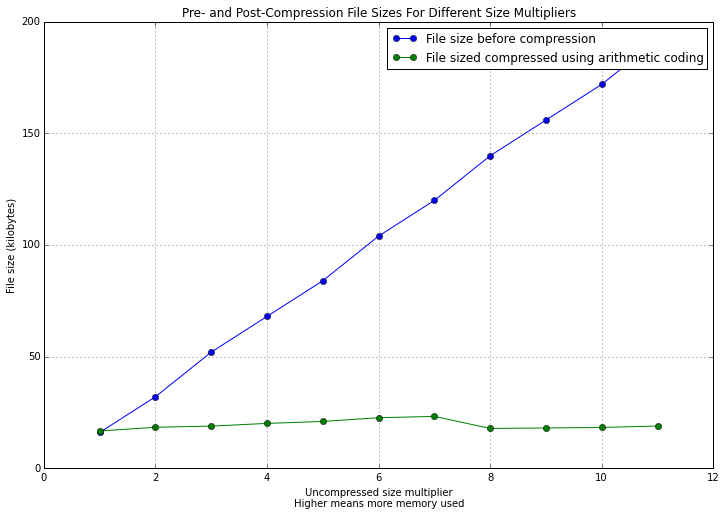

In [7]:
smaller_compressed_results_dict = pickle.load(open(bloom_filter.COMPRESSED_RESULTS_SMALLER_FILE))
graph_cbf_results(smaller_compressed_results_dict)


In [8]:
compressed_results_dict[1]

{'empirical': 1.0160761352890283e-05,
 'file size post': 2990258,
 'file size pre': 2990080,
 'insert size': 999488,
 'insert time': 103.89459586143494,
 'k': 17,
 'm': 23950378,
 'theoretical': 1e-05}